# Web Scraping from Amazon and Twitter

#### Instructions
##### 1. Create a Scrape API account and copy over your API Key
##### 2. Create a Tweepy Account and copy over your API and Consume access key and Tokens.
##### 3. To confirm that the csv has been created, open the csv using notepad ++. Excel for some reason does not seem to show the review comments

### Importing necessary libraries

In [1]:
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
import csv
import tweepy
import pandas as pd

### Scraping user comments from Amazon for PlayStation 5

#### Define the list of urls to scrape data from

In [2]:
# Define a list of URL's that will be scraped.
list_of_urls = [
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=4',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=5',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=6',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=7',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=8',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=9',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=10',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=11',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=12',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=13',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=14',
    'https://www.amazon.co.uk/PlayStation-9395003-5-Console/product-reviews/B08H95Y452/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=15',
]

#### Using Beautiful Soap and Scrape API retreive each of the each of the url's HTML data and convert the data into a beautiful soup object.  
#### Find, extract and store reviewer names and review text into a list.

In [3]:
names = []
reviews = []
data_string = ""

for url in list_of_urls: 
    params = {'api_key': "aa98690d48340123c5eff07b49a0c658", 'url': url}
    response = requests.get('http://api.scraperapi.com/',   params=urlencode(params))
    print(response)
    soup = BeautifulSoup(response.text, 'html.parser')

    for item in soup.find_all("span", class_="a-profile-name"):
      data_string = data_string + item.get_text()
      names.append(data_string)
      data_string = ""  
    
    for item in soup.find_all("span", {"data-hook": "review-body"}):
      data_string = data_string + item.get_text()
      reviews.append(data_string)
      data_string = ""

<Response [200]>
<Response [404]>
<Response [200]>
<Response [500]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [500]>
<Response [404]>
<Response [404]>
<Response [404]>
<Response [200]>
<Response [200]>
<Response [500]>
<Response [404]>


In [10]:
names_new = names[0: 70]
res = {str(names_new[i]): str(reviews[i]) for i in range(len(names_new))}
amazon_reviews_df = pd.DataFrame(list(res.items()), columns=['Reviewer Name', 'Review'])

In [25]:
amazon_reviews_df.head()

,Reviewer Name,Review
0,Craig Laws,\nHusband is happy but good lord it’s giant an...
1,Stephen,\nFabulous console. If you can get one. Buy on...
2,LightningResponse,\n♦ Introduction ♦Sony have done a fantastic j...
3,Beansmeansbeans,\nWanted to buy a PS5 for the last 3 years but...
4,Rage Pixie,\nUp-graded from a Ps4 pro to Ps5 and very hap...


#### Save Amazon Reviews to CSV

In [88]:
amazon_reviews_df.to_csv('amazon_reviews.csv', index=False, sep=',')

#### Scraping Tweets that mention playstation 5 from Twitter

Creating connection object to Twitter

In [5]:
# Authenticate to Twitter
auth = tweepy.OAuthHandler("3hL8kepi9Zg0ptkUIkdMfIffM", "lGRW1EdlVYjOFVgFuRZ7m1Jvr4Qnt5mCNm1o2bhh4PhIsQQBIF")
auth.set_access_token("1088310890749984769-ko0OVoRH2LloHJ187QOSBiLlTSl5RJ","LVf0FsiQyhMQX31tOEAIWBJSXwOaJGjXcHe0kqPgS2buB")
api = tweepy.API(auth)
# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


Query Twitter for relevant tweets

In [6]:
# Set up Tweepy API object
api = tweepy.API(auth)

# Define query parameters
query = "Amazon Playstation 5"
max_tweets = 100

# Get tweets
tweets = tweepy.Cursor(api.search_tweets,
              q=query,
              lang="en").items(max_tweets)

In [7]:
# Create empty DataFrame
tweets_df = pd.DataFrame(columns=["Reviewer Name", "Review"])

# Iterate over tweets and add to DataFrame
for tweet in tweets:
    tweets_df = tweets_df.append({
        "Reviewer Name": tweet.user.screen_name,
        "Review": tweet.text}, ignore_index=True)

C:\Users\TheBlackKing\AppData\Local\Temp\ipykernel_3048\1708452395.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append({
C:\Users\TheBlackKing\AppData\Local\Temp\ipykernel_3048\1708452395.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append({
C:\Users\TheBlackKing\AppData\Local\Temp\ipykernel_3048\1708452395.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append({
C:\Users\TheBlackKing\AppData\Local\Temp\ipykernel_3048\1708452395.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append({
C:\Users\TheBlackKing\AppData\Local\Temp\ipy

#### Save Tweets Reviews to CSV

In [27]:
tweets_df.to_csv('amazon_reviews_tweets.csv', index=False, sep=',')

In [24]:
# Print DataFrame
tweets_df.head()

,Reviewer Name,Review
0,BotConsoles,🚨🚨🚨 🇬🇧🇬🇧🇬🇧 [£479.00]\nPlayStation 5 Console\n#...
1,Allinonedealz,The Last of Us Part I is 30% Off Now.\n👇👇 \nht...
2,BotConsoles,🚨🚨🚨 [$499.00]\nPlayStation 5 Console\n#ps5 #ps...
3,falcodrin,🔥 AMAZON : Sony PlayStation 5 Console- $499\n\...
4,fixitfixitfixit,(US)PlayStation 5 Console - New - Other Selle...


In [26]:
amazon_reviews_df.head()

,Reviewer Name,Review
0,Craig Laws,\nHusband is happy but good lord it’s giant an...
1,Stephen,\nFabulous console. If you can get one. Buy on...
2,LightningResponse,\n♦ Introduction ♦Sony have done a fantastic j...
3,Beansmeansbeans,\nWanted to buy a PS5 for the last 3 years but...
4,Rage Pixie,\nUp-graded from a Ps4 pro to Ps5 and very hap...


### Read the two CSVs before cleaning data

In [46]:
amazon_reviews_df = pd.read_csv('amazon_reviews.csv', low_memory=False)
amazon_reviews_tweets_df = pd.read_csv('amazon_reviews_tweets.csv', low_memory=False)

In [47]:
amazon_reviews_df.head()
print(amazon_reviews_df.size)

96


In [48]:
amazon_reviews_tweets_df.head()
print(amazon_reviews_tweets_df.size)

200


In [49]:
all_tweets_df = amazon_reviews_df.append(amazon_reviews_tweets_df)

C:\Users\TheBlackKing\AppData\Local\Temp\ipykernel_13160\3206787789.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_tweets_df = amazon_reviews_df.append(amazon_reviews_tweets_df)


In [50]:
len(all_tweets_df)
all_tweets_df.head()

,Reviewer Name,Review
0,Craig Laws,\nHusband is happy but good lord it’s giant an...
1,Stephen,\nFabulous console. If you can get one. Buy on...
2,LightningResponse,\n♦ Introduction ♦Sony have done a fantastic j...
3,Beansmeansbeans,\nWanted to buy a PS5 for the last 3 years but...
4,Rage Pixie,\nUp-graded from a Ps4 pro to Ps5 and very hap...


### Cleaning Data

In [51]:
import numpy as np
import re
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')   
nltk.download('stopwords')
nltk.download("vader_lexicon")   

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TheBlackKing\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TheBlackKing\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TheBlackKing\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
def link_at_s_removal(text):  
    pat1 = r'@_?[A-Za-z0-9]+'  # @[A-Za-z0-9]+
    pat2 = r'https?://[A-Za-z0-9./]+'  
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4))
    text = re.sub(combined_pat,"",text)
    text = text
    return text

In [53]:
def clean_text(text):
    print ("Running for text: "+text+"\n") 
    text=link_at_s_removal(text)
    
    text = re.sub('[^A-Za-z\s]', '', text.lower())        #remove non-alphabet
    tokenized_text = WordPunctTokenizer().tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in stopwords.words()
    ]
    final_text = ' '.join(clean_text)
    final_text = final_text.replace("rt","")
    final_text = final_text.replace("RT","")
    return final_text

In [54]:
all_tweets_df["clean_reviews"] = [clean_text(tw) for tw in all_tweets_df["Review"].values]

Running for text: 
Husband is happy but good lord it’s giant and ugly as sin.


Running for text: 
Fabulous console. If you can get one. Buy one.


Running for text: 
♦ Introduction ♦Sony have done a fantastic job with their new generation of console, the PlayStation 5.I won't bore with the specifications, however one thing is for sure, this thing is a "beast", especially when considering the price of a PC with equivalent specifications would cost so much more.It is important to note that there are two versions of the PS5; both have the exact same internal specifications including memory space (825GB SSD, with around 667GB of that being useable), so it's down to your preference on how you buy games and whether you see any use in having a disc drive:• PS5 - Digital Version: This is the cheapest model in the short-term. As this is lacking a disc drive you cannot watch Blu-Ray's or put in game discs with this version. To purchase games, you will need to connect the console online by Wi-Fi

In [55]:
all_tweets_df.head()

,Reviewer Name,Review,clean_reviews
0,Craig Laws,\nHusband is happy but good lord it’s giant an...,husband happy lord giant ugly
1,Stephen,\nFabulous console. If you can get one. Buy on...,fabulous console buy
2,LightningResponse,\n♦ Introduction ♦Sony have done a fantastic j...,introduction sony fantastic job generation con...
3,Beansmeansbeans,\nWanted to buy a PS5 for the last 3 years but...,wanted buy ps years find gameplay smoother fas...
4,Rage Pixie,\nUp-graded from a Ps4 pro to Ps5 and very hap...,upgraded ps pro ps happy didthe biggest differ...


### Stemming Sentences

In [71]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
porter = PorterStemmer()

In [59]:
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [60]:
all_tweets_df["stem_reviews"] = [stemSentence(tw) for tw in all_tweets_df["clean_reviews"].values]

In [75]:
all_tweets_df["stem_reviews"].head()

0                       husband happi lord giant ugli 
1                                    fabul consol buy 
2    introduct soni fantast job gener consol playst...
3    want buy ps year find gameplay smoother faster...
4    upgrad ps pro ps happi didth biggest differ ps...
Name: stem_reviews, dtype: object

In [67]:
stemmed_reviews = " ".join(list(all_tweets_df["clean_reviews"].values)).lower()

In [73]:
wordcloud_stemmed_tweets = WordCloud(
                background_color ='white', 
                min_font_size = 5).generate(stemmed_reviews)

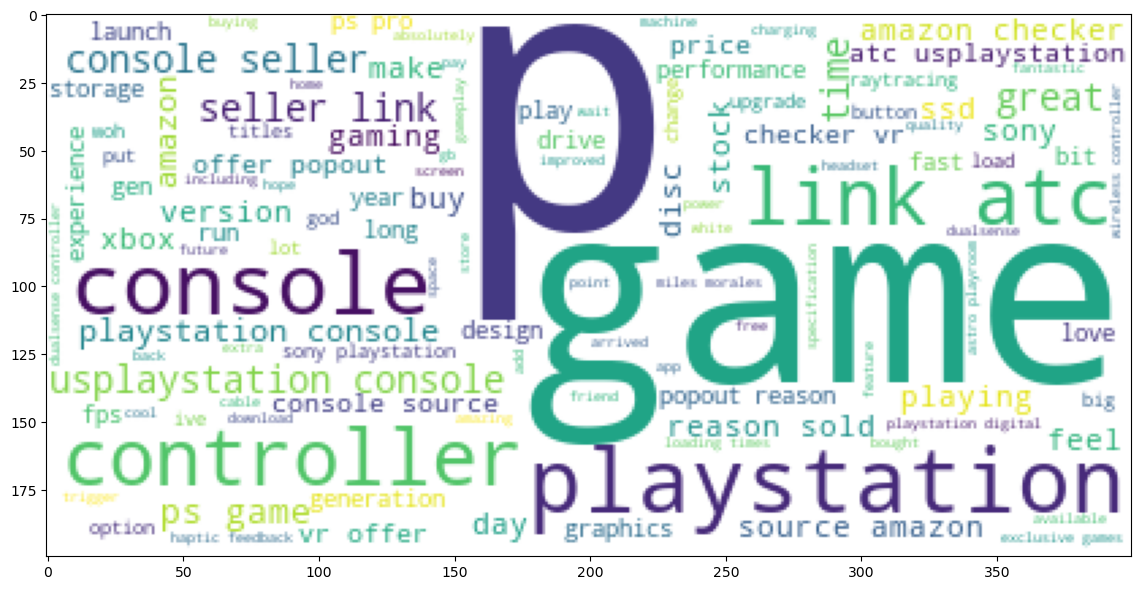

In [74]:
fig, ax = plt.subplots(figsize=(14, 8),sharey=True)
ax.imshow(wordcloud_stemmed_tweets)

### Lemmatizing Sentences

In [76]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [79]:
def lemmatize_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words
    stem_sentence=[]
    lemmatized_output = ' '.join([wordnet_lemmatizer.lemmatize(w) for w in sentence_words])
    return lemmatized_output

In [85]:
all_tweets_df["lemmatized_reviews"] = [lemmatize_sentence(tw) for tw in all_tweets_df["stem_reviews"].values]

In [86]:
all_tweets_df.head()

,Reviewer Name,Review,clean_reviews,stem_reviews,lemmatized_reviews
0,Craig Laws,\nHusband is happy but good lord it’s giant an...,husband happy lord giant ugly,husband happi lord giant ugli,husband happi lord giant ugli
1,Stephen,\nFabulous console. If you can get one. Buy on...,fabulous console buy,fabul consol buy,fabul consol buy
2,LightningResponse,\n♦ Introduction ♦Sony have done a fantastic j...,introduction sony fantastic job generation con...,introduct soni fantast job gener consol playst...,introduct soni fantast job gener consol playst...
3,Beansmeansbeans,\nWanted to buy a PS5 for the last 3 years but...,wanted buy ps years find gameplay smoother fas...,want buy ps year find gameplay smoother faster...,want buy p year find gameplay smoother faster ...
4,Rage Pixie,\nUp-graded from a Ps4 pro to Ps5 and very hap...,upgraded ps pro ps happy didthe biggest differ...,upgrad ps pro ps happi didth biggest differ ps...,upgrad p pro p happi didth biggest differ p pr...


In [87]:
lemmatized_reviews = " ".join(list(all_tweets_df["lemmatized_reviews"].values)).lower()

In [88]:
wordcloud_stemmed_tweets = WordCloud(
                background_color ='white', 
                min_font_size = 5).generate(lemmatized_reviews)

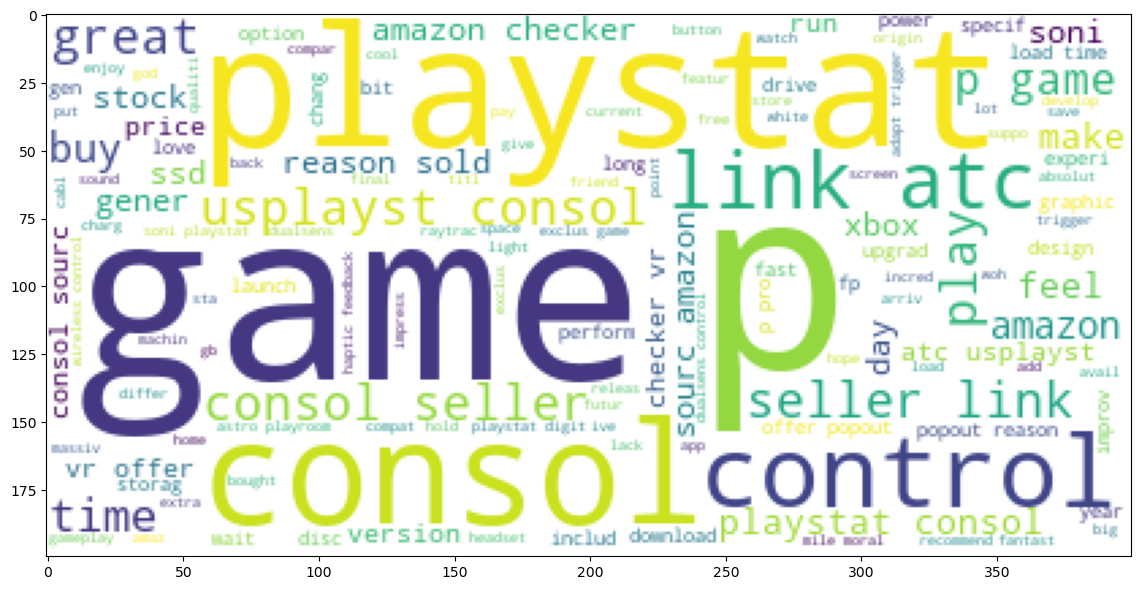

In [89]:
fig, ax = plt.subplots(figsize=(14, 8),sharey=True)
ax.imshow(wordcloud_stemmed_tweets)

In [90]:
all_tweets_df.columns

Index(['Reviewer Name', 'Review', 'clean_reviews', 'stem_reviews',
       'lemmatized_reviews'],
      dtype='object')

#### Saving final dataframe to CSV

In [91]:
header = ["Reviewer Name", "clean_reviews", "stem_reviews", "lemmatized_reviews"]
all_tweets_df.to_csv('final_output.csv', columns = header)